Reference links:

https://olegleyz.github.io/titanic_factors.html

http://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html

Problem Description:

The Titanic challenge on Kaggle is a competition in which the task is to predict the survival or the death of a given passenger based on a set of variables describing him such as his age, his sex, or his passenger class on the boat

In [30]:
#import necessary modules
import pandas as pd
import numpy as np
import matplotlib
import seaborn as se
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
#load the training data
trainData = pd.read_csv("C:/Users/Arko/Downloads/Studies/PersonalResearch/TitanicData/train.csv")
#trainData.head()
#trainData.columns
#rearrange the data to move the Target Column to the end
trainData = trainData[['PassengerId','Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked','Survived']]
trainData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [3]:
#Load the test data
testData = pd.read_csv("C:/Users/Arko/Downloads/Studies/PersonalResearch/TitanicData/test.csv")
#testData.columns
testData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Variable Description:

Target Variable : 
    
    'Survived'. If Suvival = 1, the passenger has survived,  else dead.

Remaining Variables:

    PassengerId: unique id given to each traveler.
    Pclass: the passenger class. It has three possible values: 1,2,3.
    Name, Sex and Age are self-explanatory
    SibSp: # of siblings and spouses traveling with the passenger
    Parch: # of parents and children traveling with the passenger
    Ticket: The ticket number
    Fare : The ticket Fare
    Cabin: The cabin number
    Embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


Exploratory Analysis on Training data

In [4]:
#get the summary statistics for Numeric variables
trainData.describe()

C:\Users\Arko\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,NaN,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,NaN,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,NaN,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [5]:
#the summary stats show that except Age, all the other variables do not have missing data
#replacing the missing values of Age with the median value since it is more robust to ouliers compared to mean
trainData['Age'].fillna(trainData['Age'].median(),inplace=True)
#trainData['Age'].describe()

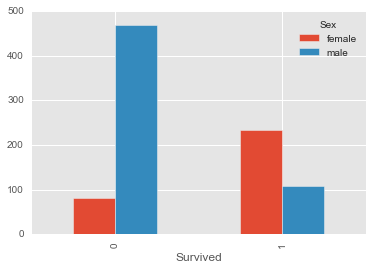

In [6]:
#observe the survival numbers by gender
pd.crosstab(trainData['Survived'],trainData['Sex']).plot(kind='bar',stacked=False)
#Insight : females have a greater probability to survive

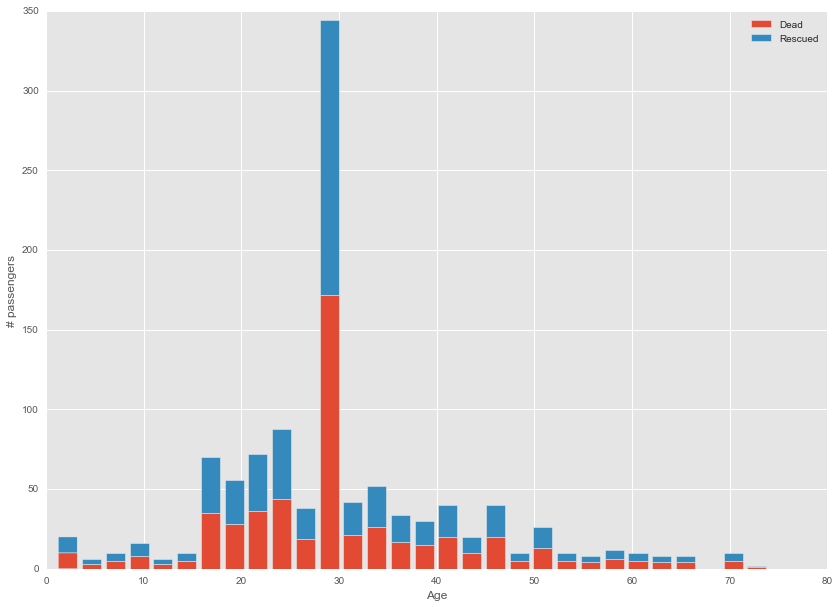

In [7]:
#observe survival numbers by Age bins
plt.figure(figsize=(14,10))
plt.hist([trainData[trainData['Survived']==0]['Age'],trainData[trainData['Survived']==0]['Age']],stacked = True,
         bins = 30, label = ['Dead','Rescued'])
plt.xlabel('Age')
plt.ylabel('# passengers')
plt.legend()
plt.show()
#Insight : Nothing conclusive can be stated

Adults    0.828283
Young     0.126824
Old       0.044893
Name: ageBins, dtype: float64


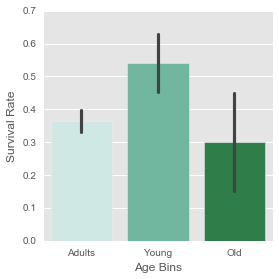

In [8]:
#since the above plot was not conclusive, created bins for the Age variable and plotted the Survival Numbers on the same
def ageGroup(age):
    if age < 18:
        return "Young"
    elif age > 55:
        return "Old"
    else:
        return "Adults"
trainData['ageBins'] = trainData['Age'].apply(ageGroup)
print(trainData['ageBins'].value_counts(normalize = True))
plot = se.factorplot('ageBins','Survived',data = trainData,kind = 'bar',palette = 'BuGn')
plot.set_axis_labels("Age Bins","Survival Rate")
#Insight: Young people have a high survival rate
#drop the ageBins variable
trainData.drop('ageBins',axis=1,inplace = True)
#trainData.columns

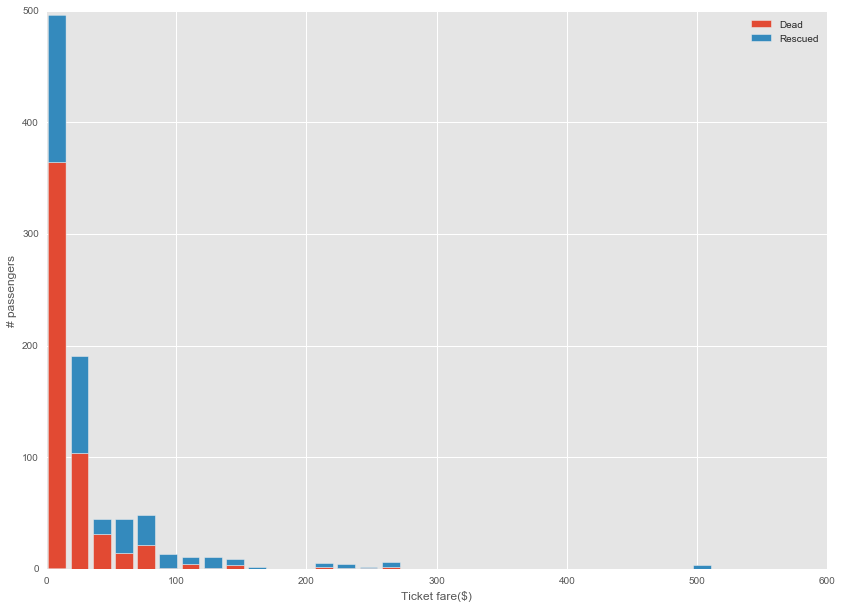

In [9]:
#observing Survival numbers based on Ticket fares
plt.figure(figsize=(14,10))
plt.hist([trainData[trainData['Survived']==0]['Fare'],trainData[trainData['Survived']==1]['Fare']],
        stacked = True,bins = 30, label = ['Dead','Rescued'])
plt.xlabel('Ticket fare($)')
plt.ylabel('# passengers')
plt.legend()
#Insight: Passengers with Higher fare were given preferance for being rescued 

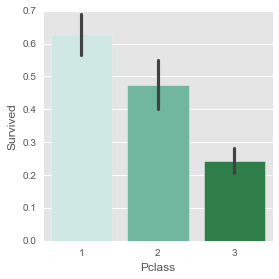

In [10]:
#observe the survival numbers by Passenger class
plot = se.factorplot('Pclass','Survived',data = trainData,kind = 'bar',palette = 'BuGn')
#Insight: passengers belonging to 1st class were rescued more
#This aligns with the above insight since passengers with higher class will have more expensive ticket fares

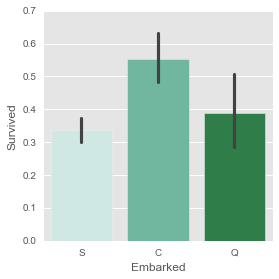

In [11]:
#observe the survival numbers by Embarkation status
plot = se.factorplot('Embarked','Survived',data = trainData,kind = 'bar',palette = 'BuGn')
#Insight: Passengers who boarded from Cherbourg had the highest Survival rate. However this variable is Nominal. 
#Hence need to decide later if it should be included in the final model

Feature Engineering

In [12]:
#a status function to be used for each of the feature engineering function
def statusFunction(feature):
    print('Processing',feature,':ok')

In [13]:
#combine train and test data
def combineData():
    train = pd.read_csv("C:/Users/Arko/Downloads/Studies/PersonalResearch/TitanicData/train.csv")
    test = pd.read_csv("C:/Users/Arko/Downloads/Studies/PersonalResearch/TitanicData/test.csv")
    #remove the Survived column from train so that train and test can be combined
    train.drop('Survived',axis=1,inplace = True)
    combined = pd.concat([train,test],axis = 0)
    combined.reset_index(inplace = True)
    #removing unnecessary index column
    combined.drop('index',axis = 1,inplace=True)
    return(combined)
data = combineData()
print(data.shape)
data.head()

(1309, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
#processing Name
#Extracting passenger titles from the names
data['title'] = data['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())
data['title'].unique()
#now that we know the different titles present in the Names, we can group them accordingly using a title dictionary
titleDict = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }
data['title'] = data['title'].map(titleDict)
#we can remove the Name variable since its no longer required
data.drop('Name',axis = 1, inplace = True)
data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [15]:
#processing Age
data['Age'].describe()
#There are large number of missing values. It would not be correct to simple replace the missing values by overall median
#rather group them by Sex, Pclass and Title and replce missing values with median accrodingly
data['Age'] = data.groupby(['Sex','Pclass','title'])['Age'].transform(lambda x: x.fillna(x.median()))
data.head()

C:\Users\Arko\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [16]:
#one-hot encode the title variable
titleEncoded = pd.get_dummies(data['title'],prefix = "Title_")
data = pd.concat([data,titleEncoded],axis = 1)
#remove the title column
data.drop('title',axis = 1,inplace = True)
data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Officer,Title__Royalty
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0.0,1.0,0.0,0.0,0.0
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0.0,0.0,0.0,1.0,0.0,0.0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,1.0,0.0,0.0,0.0,0.0
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,0.0,0.0,0.0,1.0,0.0,0.0
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0,0.0,1.0,0.0,0.0,0.0


In [17]:
#one-hot encode Pclass variable
pclassEncoded = pd.get_dummies(data['Pclass'],prefix = 'Pclass_')
data = pd.concat([data,pclassEncoded],axis = 1)
#drop the pclass variable
data.drop('Pclass',axis = 1,inplace = True)
data.head()

,PassengerId,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Officer,Title__Royalty,Pclass__1,Pclass__2,Pclass__3
0,1,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,female,38.0,1,0,PC 17599,71.2833,C85,C,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,female,35.0,1,0,113803,53.1000,C123,S,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5,male,35.0,0,0,373450,8.0500,NaN,S,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
#one-hot encode Embarked variable
embarkedEncoded = pd.get_dummies(data['Embarked'],prefix = 'Embarked_')
data = pd.concat([data,embarkedEncoded],axis = 1)
#drop the pclass variable
data.drop('Embarked',axis = 1,inplace = True)
data.head()

,PassengerId,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Officer,Title__Royalty,Pclass__1,Pclass__2,Pclass__3,Embarked__C,Embarked__Q,Embarked__S
0,1,male,22.0,1,0,A/5 21171,7.2500,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,female,38.0,1,0,PC 17599,71.2833,C85,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,4,female,35.0,1,0,113803,53.1000,C123,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5,male,35.0,0,0,373450,8.0500,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [19]:
#processing Fare
#there is just one missing value. Can replace it with mean
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

In [20]:
#processing Sex variable
#converting male to 1 and female to 0
data['Sex']=data['Sex'].map({'male':1,'female':0})
data.head()

,PassengerId,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Officer,Title__Royalty,Pclass__1,Pclass__2,Pclass__3,Embarked__C,Embarked__Q,Embarked__S
0,1,1,22.0,1,0,A/5 21171,7.2500,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,0,38.0,1,0,PC 17599,71.2833,C85,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,4,0,35.0,1,0,113803,53.1000,C123,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5,1,35.0,0,0,373450,8.0500,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [21]:
#combining Parch and SibSp to a one variable named FamilySize
# the +1 includes the passenger oneself
data['FamilySize'] = data['Parch'] + data['SibSp'] + 1
data.drop(['Parch','SibSp'],axis=1,inplace=True)
data.head()

,PassengerId,Sex,Age,Ticket,Fare,Cabin,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Officer,Title__Royalty,Pclass__1,Pclass__2,Pclass__3,Embarked__C,Embarked__Q,Embarked__S,FamilySize
0,1,1,22.0,A/5 21171,7.2500,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2
1,2,0,38.0,PC 17599,71.2833,C85,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
2,3,0,26.0,STON/O2. 3101282,7.9250,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
3,4,0,35.0,113803,53.1000,C123,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2
4,5,1,35.0,373450,8.0500,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1


In [26]:
#introducing boolean attributes based on FamilySize
data['Singleton'] = data['FamilySize'].map(lambda x : 1 if x == 1 else 0)
data['SmallFamily'] = data['FamilySize'].map(lambda x : 1 if x>1 & x<5 else 0)
data['LargeFamily'] = data['FamilySize'].map(lambda x : 1 if x>=5 else 0)
data.head()

,PassengerId,Sex,Age,Ticket,Fare,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Officer,...,Cabin__C,Cabin__D,Cabin__E,Cabin__F,Cabin__G,Cabin__T,Cabin__U,Singleton,SmallFamily,LargeFamily
0,1,1,22.0,A/5 21171,7.2500,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0
1,2,0,38.0,PC 17599,71.2833,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
2,3,0,26.0,STON/O2. 3101282,7.9250,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0
3,4,0,35.0,113803,53.1000,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
4,5,1,35.0,373450,8.0500,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0


In [25]:
#processing Cabin variable
#replace all NaN values with 'U', meaning Unknown
data['Cabin'].fillna('U',inplace=True)
#for the rest of the values replace with only the first character. This will help in simplifying the values
data['Cabin'] = data['Cabin'].map(lambda x:x[0])
#Now we can one-hot encode the levels
cabinEncoded = pd.get_dummies(data['Cabin'],prefix = 'Cabin_')
data = pd.concat([data,cabinEncoded],axis = 1)
data.drop('Cabin',axis = 1, inplace = True)
data.head()

,PassengerId,Sex,Age,Ticket,Fare,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Officer,...,FamilySize,Cabin__A,Cabin__B,Cabin__C,Cabin__D,Cabin__E,Cabin__F,Cabin__G,Cabin__T,Cabin__U
0,1,1,22.0,A/5 21171,7.2500,0.0,0.0,1.0,0.0,0.0,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,0,38.0,PC 17599,71.2833,0.0,0.0,0.0,1.0,0.0,...,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,26.0,STON/O2. 3101282,7.9250,0.0,1.0,0.0,0.0,0.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,0,35.0,113803,53.1000,0.0,0.0,0.0,1.0,0.0,...,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1,35.0,373450,8.0500,0.0,0.0,1.0,0.0,0.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
#dropping Ticket variable since it might not be adding any significant value to the analysis
data.drop('Ticket',axis=1,inplace = True)

In [32]:
#Scaling all features except PassengerId
#scaling can be applicable since we have converted all variables to numeric values
features = list(data.columns)
features.remove('PassengerId')
#use scikit-learn MinMaxScaler to normalize all the variables
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])
data.head()

,PassengerId,Sex,Age,Fare,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Officer,Title__Royalty,...,Cabin__C,Cabin__D,Cabin__E,Cabin__F,Cabin__G,Cabin__T,Cabin__U,Singleton,SmallFamily,LargeFamily
0,1,1.0,0.273456,0.014151,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2,0.0,0.473882,0.139136,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,0.0,0.323563,0.015469,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,4,0.0,0.436302,0.103644,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,1.0,0.436302,0.015713,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
